homework: implement SIFT algorithms

In [3]:
# Imports the print function from newer versions of python
from __future__ import print_function

# Setup

# The Random module implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# The Time library helps us time code runtimes
import time

# The skimage is used for the image processing tasks
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the

import cv2
import math
# notebook rather than in a new window.
%matplotlib inline

## Feature detecting and matching 

The target of this practice is to use different algorithms for featrue detecting, extract feature descriptor and 


Your task will be :
* Use Histogram of Oriented Gradients (for feature descriptor)
* Use Scale-Invariant Feature Transform(SIFT) for feature discriptor (Homework)


If see your <span style="color:red">#### YOUR CODE ####</span>  headline, it is the part you need to implement

## Histogram of Oriented Gradients(HoG) step by step:

Histogram of Oriented Gradients (HoG) is a global feature representation, in the sense that one feature description is calculated for the entire image or an image-patch. The descriptor is a vector which contains many histograms. Each histogram belongs to a local area within the image and counts the frequency of gradient-directions in this local area.

In images gradients in x- and y-direction, can easily be calculated by filters like Prewitt, Sobel, or the first-order derivative of a Gaussian. The magnitude of a gradient is large at edges and the orientation of the gradient-vector indicates the orientation of edges. Hence HoG-features encode the structure of objects in an image and can be applied for all detection and recognition tasks, for which structure-information is assumed to be crucial.

In this notebook the calculation of a HoG-descriptor of an image-patch is demonstrated step-by-step. In follow-up notebooks the application of HoG-descriptors for the detection of pedestrians in images and for tracking of pedestrians in videos are demonstrated.

<class 'numpy.ndarray'>


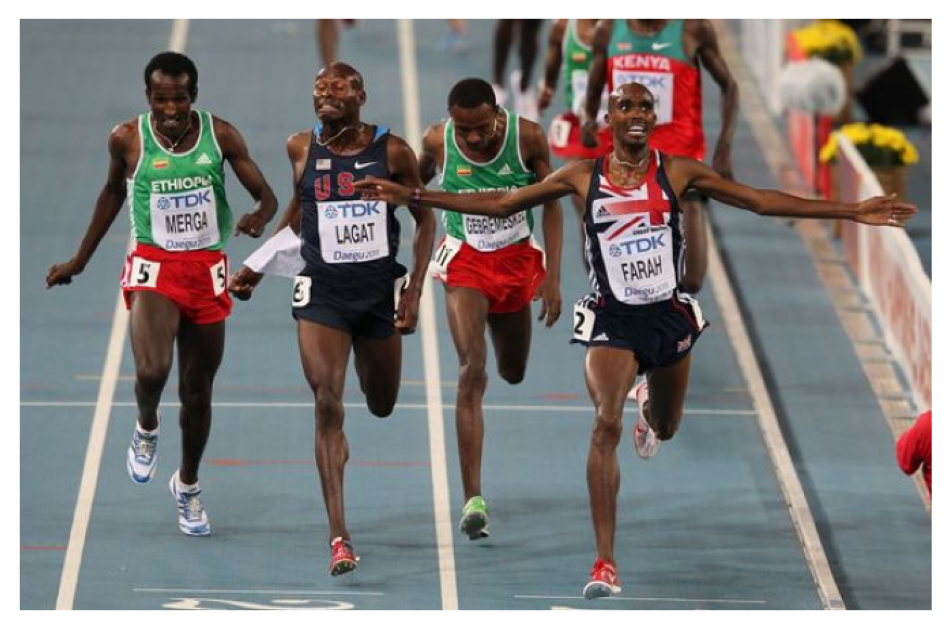

In [4]:
imagePath="./img_01.png"
image =plt.imread(imagePath)
print(type(image))
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(image)
plt.show()

#### Step 1: Image preprocessing (Extract Image Patch)


HoG are calculated for image patches (i.e. sub-windows within the image). For example in a pedestrian-detection task a window is slided over the entire image. At each window-position the HoG-descriptor is calculated. This HoG-descriptor is then passed to a binary classifier, e.g. a Support-Vector-Machine (SVM), which determines whether or not there is a pedestrian in the current sub-window.

In this exercise a patch-size of 128 rows and 64 columns is applied. In the code cell below the upper-left corner of the patch is at position Location. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


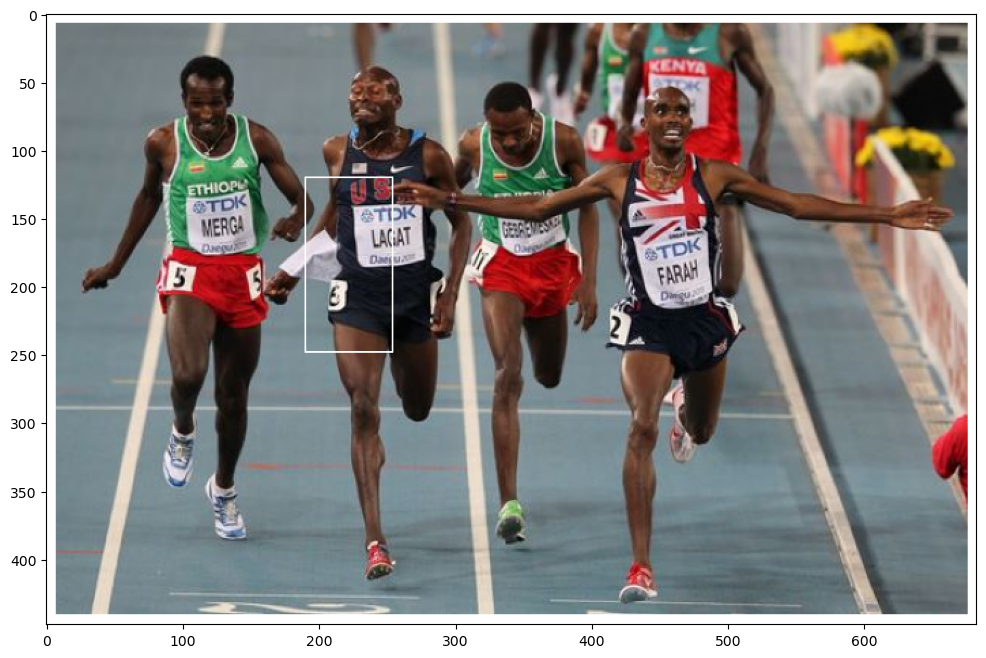

In [5]:
np_im=image.copy()
#Location=[0,0]
Location=[120,190]  # first component is vertical axis, second is horizontal axis 
PatchSize=[128,64]  # first component is vertical axis, second is horizontal axis



#Draw frame around selected patch 
plt.figure(figsize=(12,10))
cv2.rectangle(np_im, (Location[1], Location[0]), 
                      (Location[1]+PatchSize[1],Location[0]+PatchSize[0]), 
                     (255, 255, 255), 1)

plt.imshow(np_im)
plt.show()

The patch is further subdivided into regions of size 8×8
. For each of these region an individual histogram is calculated. The entire HoG-descriptor of the patch is the concatenation of all regional histograms within the patch.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


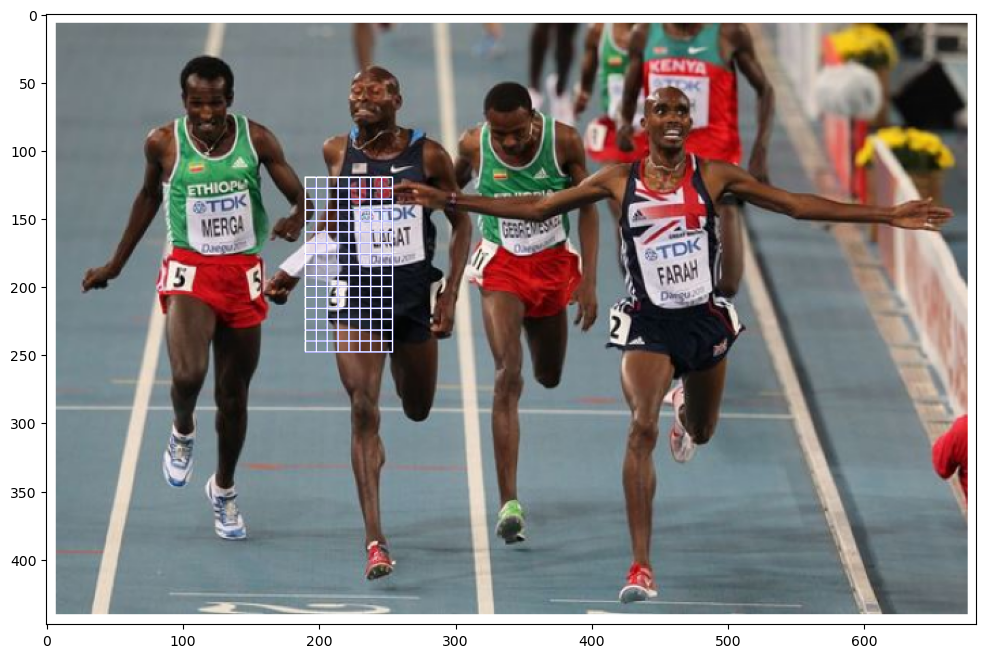

In [6]:

numlinesY=int(PatchSize[0]/8)
numlinesX=int(PatchSize[1]/8)

#Draw region boundaries within the patch
plt.figure(figsize=(12,10))
for x in range(numlinesX):
    cv2.line(np_im,(Location[1]+8*(x+1),Location[0]),
                   (Location[1]+8*(x+1),Location[0]+PatchSize[0]),
                   (0, 0, 255), 1)
    
for y in range(numlinesY):
    cv2.line(np_im,(Location[1],Location[0]+8*(y+1)),
                   (Location[1]+PatchSize[1],Location[0]+8*(y+1)),
                   (0, 0, 255), 1)
plt.imshow(np_im)
plt.show()

#### Step2: Calculate Gradient

If you remember in our last practice_02 course, we Apply Sobel Filter to calculate partial derivations of the image from scratch. In this case, you can try to use opencv library for the calculation. 

In [7]:
np_im2=image.copy()
gx = cv2.Sobel(np_im2, cv2.CV_32F, 1, 0, ksize=1)[:,:,:3]
gy = cv2.Sobel(np_im2, cv2.CV_32F, 0, 1, ksize=1)[:,:,:3]

In [8]:
gx.shape

(448, 683, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


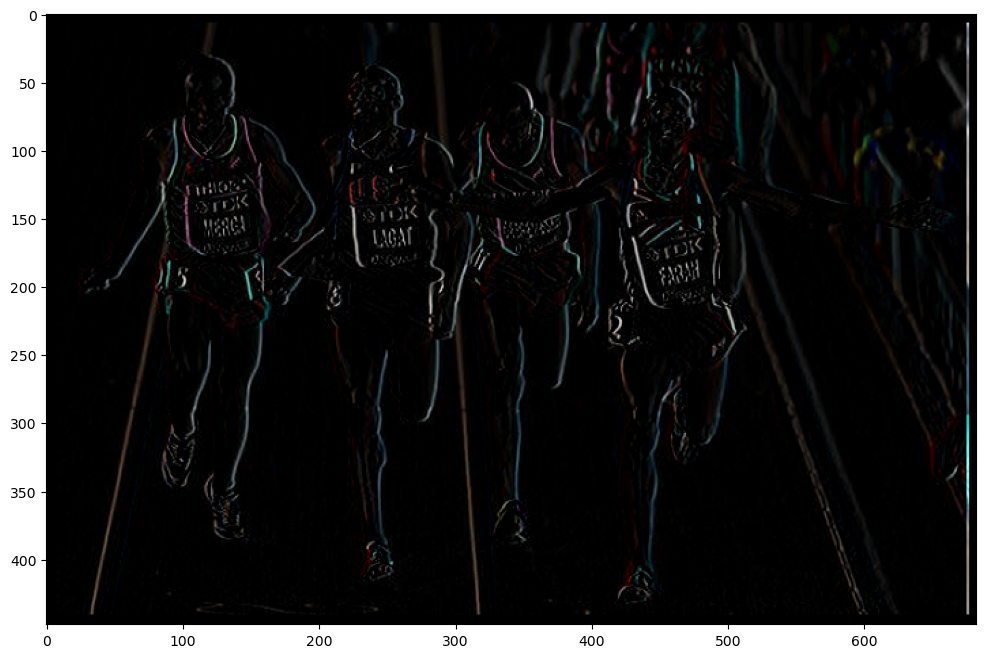

In [10]:
plt.figure(figsize=(12,10))
plt.imshow(gx,)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


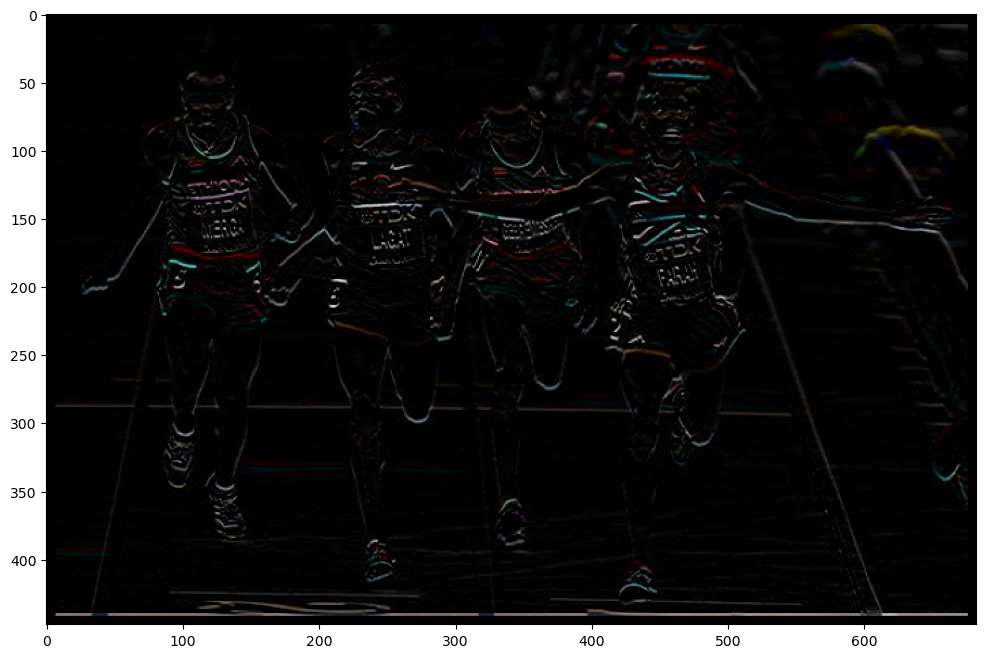

In [11]:
plt.figure(figsize=(12,10))
plt.imshow(gy)
plt.show()

#### Step 3: Analyse Pixels and Gradients in a 8×8 region


For the upper left 8×8 -region of the selected patch the pixel values of channel Chan are displayed and visualized in the following code cells. There is a vertical edge in within this region. Hence there should be high values for the gradients in direction of x.

In [12]:
Chan=1  # Channel to be used for visualisation
W=8     # Region-width and -height

Pixel values in the selected channel at the selected region:

In [13]:
print((np_im2[Location[0]+W*2:Location[0]+W*3,Location[1]+W*2:Location[1]+W*3, Chan]*255).astype(int))

[[136 136  96  55  36  33  22  21]
 [137 127  86  51  34  31  24  30]
 [133 112  77  47  30  24  25  41]
 [118  88  66  47  29  19  25  35]
 [105  72  60  48  32  20  26  26]
 [ 86  68  57  45  32  23  21  22]
 [ 76  62  53  43  33  25  23  29]
 [ 69  56  48  41  33  26  26  40]]


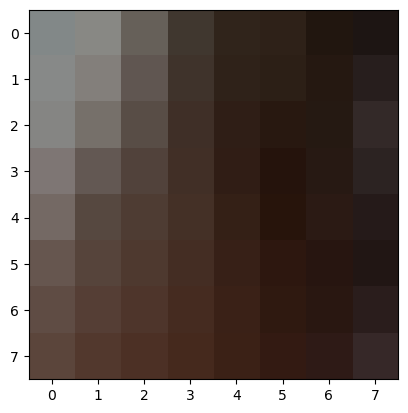

In [14]:
plt.imshow((np_im2[Location[0]+W*2:Location[0]+W*3,Location[1]+W*2:Location[1]+W*3]*255).astype(int))
plt.show()

In [15]:
print((gx[Location[0]+W*2:Location[0]+W*3,Location[1]+W*2:Location[1]+W*3,Chan]*255).astype(int))

[[  6 -40 -81 -60 -21 -14 -12  -2]
 [ -5 -51 -75 -52 -20 -10   0  13]
 [-24 -56 -64 -47 -23  -4  17  25]
 [-47 -51 -41 -37 -28  -3  16  10]
 [-58 -45 -24 -27 -28  -6   5 -12]
 [-43 -29 -23 -24 -22 -11   0  16]
 [-43 -23 -18 -19 -18 -10   3  19]
 [-39 -21 -14 -14 -15  -7  14  20]]


In [16]:
print((gy[Location[0]+W*2:Location[0]+W*3,Location[1]+W*2:Location[1]+W*3,Chan]*255).astype(int))

[[  3 -12 -14  -4   0  -1   1   0]
 [ -2 -24 -18  -7  -6  -9   2  20]
 [-19 -38 -19  -3  -5 -11   0   5]
 [-28 -39 -17   0   2  -3   0 -15]
 [-31 -19  -9  -1   3   3  -3 -13]
 [-28 -10  -6  -4   0   4  -2   2]
 [-16 -12  -8  -3   0   2   4  18]
 [-14 -11  -9  -6  -2   2   7  15]]


#### Step3: Magnitude and Angle of the Gradients

The magnitude and the direction of the gradient can be calculated as follows:

$$
g = \sqrt{[g_x]^2+[g_y]^2}
$$

$$
\theta = arctan (G_x(A)/G_y(A))
$$

hint you can use  opencv’s cartToPolar()-function to calculate these two variables.

In [17]:
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
print(mag.shape)
print(angle.shape)

(448, 683, 3)
(448, 683, 3)


In [18]:
print((mag[Location[0]+W*2:Location[0]+W*3,Location[1]+W*2:Location[1]+W*3,Chan]*255).astype(int))

[[ 8 41 82 60 22 14 12  3]
 [ 5 56 78 52 20 13  3 23]
 [30 68 68 47 23 12 17 25]
 [54 65 44 37 28  5 16 18]
 [66 49 25 28 28  7  7 17]
 [52 30 24 25 22 12  3 16]
 [46 25 21 20 18 10  6 26]
 [41 24 18 16 15  7 16 25]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


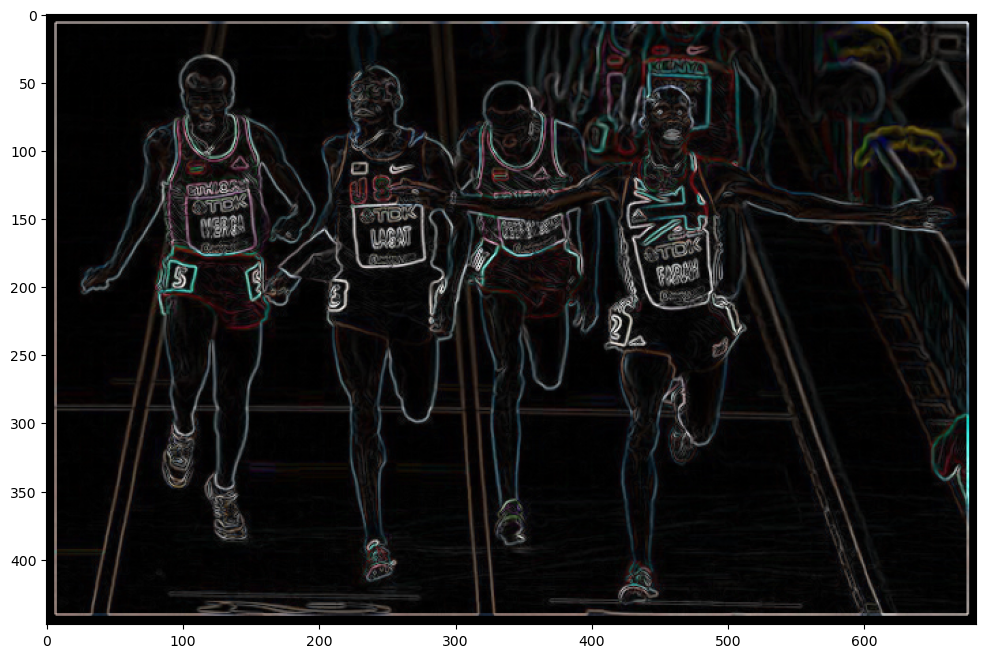

In [19]:
plt.figure(figsize=(12,10))
plt.imshow(mag)
plt.show()

#### Step 4: Apply max-operator over channels

Up to now gradients have been calculated for all channels individually. For calculating the HOG-descriptor, at each pixel-position the channel with the highest gradient at this position is determined. Only the gradients of the locally strongest channel are applied in the HoG-descriptor.

The array maxChan, as calculated below, contains for each pixel the channel with the highest magnitude at the pixel’s position.



In [20]:
maxChan=np.argmax(mag,axis=2)
print(maxChan.shape)


(448, 683)


As shown below, at the upper-left pixel in the selected patch channel 0 has the strongest gradient. One pixel below, the highest gradient-magnitude is in channel 1.

In [21]:
print(maxChan[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[0 0 2 2 0 0 0 0]
 [0 0 2 2 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [2 0 0 2 2 1 0 0]
 [2 2 2 0 2 1 2 0]
 [0 1 2 2 0 1 2 2]
 [0 0 2 1 0 2 0 0]
 [2 0 0 1 2 2 0 0]]


Calculate a 2-dimensional array, which contains only the gradient-magnitude of the locally strongest channel (strongest=channel with highest gradient).

In [22]:
maxmag=np.zeros(maxChan.shape)
for r in range(maxChan.shape[0]):
    for c in range(maxChan.shape[1]):
        maxmag[r,c]=mag[r,c,maxChan[r,c]]
print(maxmag.shape)

(448, 683)


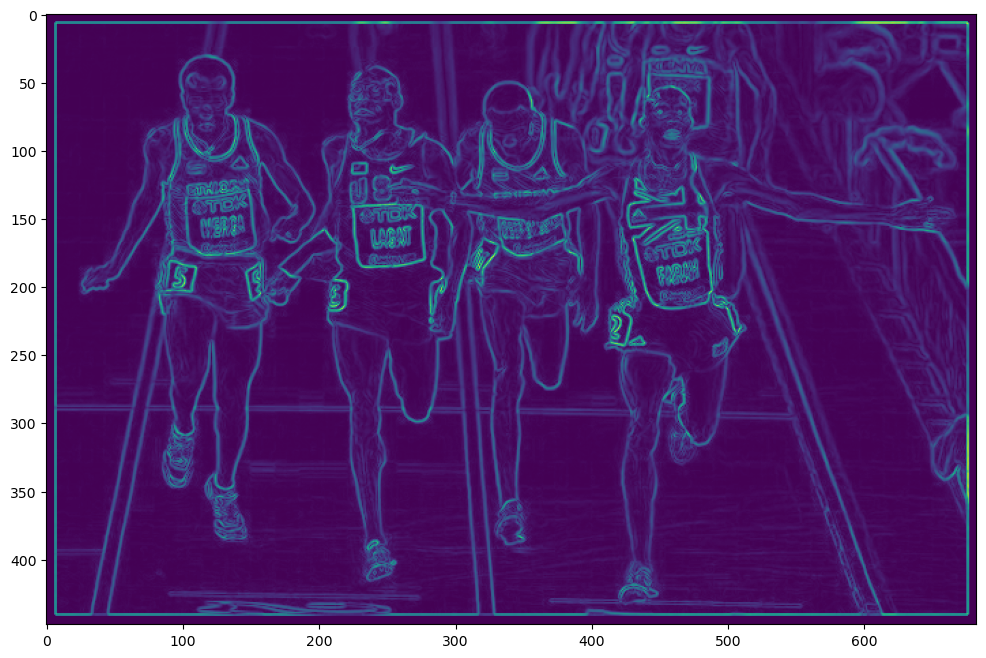

In [23]:
plt.figure(figsize=(12,10))
plt.imshow(maxmag)
plt.show()

#### Step 5: Apply max-operator over channels

Up to now gradients have been calculated for all channels individually. For calculating the HOG-descriptor, at each pixel-position the channel with the highest gradient at this position is determined. Only the gradients of the locally strongest channel are applied in the HoG-descriptor.

You need to calcualte  'maxChan' that contains for each pixel the channel with the highest magnitude at the pixel’s position.

In [24]:
maxChan=np.argmax(mag,axis=2)
print(maxChan.shape)

(448, 683)


As shown below, at the upper-left pixel in the selected patch channel 0 has the strongest gradient. One pixel below, the highest gradient-magnitude is in channel 0.

In [25]:
print(maxChan[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[0 0 2 2 0 0 0 0]
 [0 0 2 2 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [2 0 0 2 2 1 0 0]
 [2 2 2 0 2 1 2 0]
 [0 1 2 2 0 1 2 2]
 [0 0 2 1 0 2 0 0]
 [2 0 0 1 2 2 0 0]]


Calculate a 2-dimensional array, which contains only the gradient-magnitude of the locally strongest channel (strongest=channel with highest gradient).

In [26]:
maxmag=np.zeros(maxChan.shape)
for r in range(maxChan.shape[0]):
    for c in range(maxChan.shape[1]):
        maxmag[r,c]=mag[r,c,maxChan[r,c]]
print(maxmag.shape)

(448, 683)


Visualisation of the maximum Gradient:

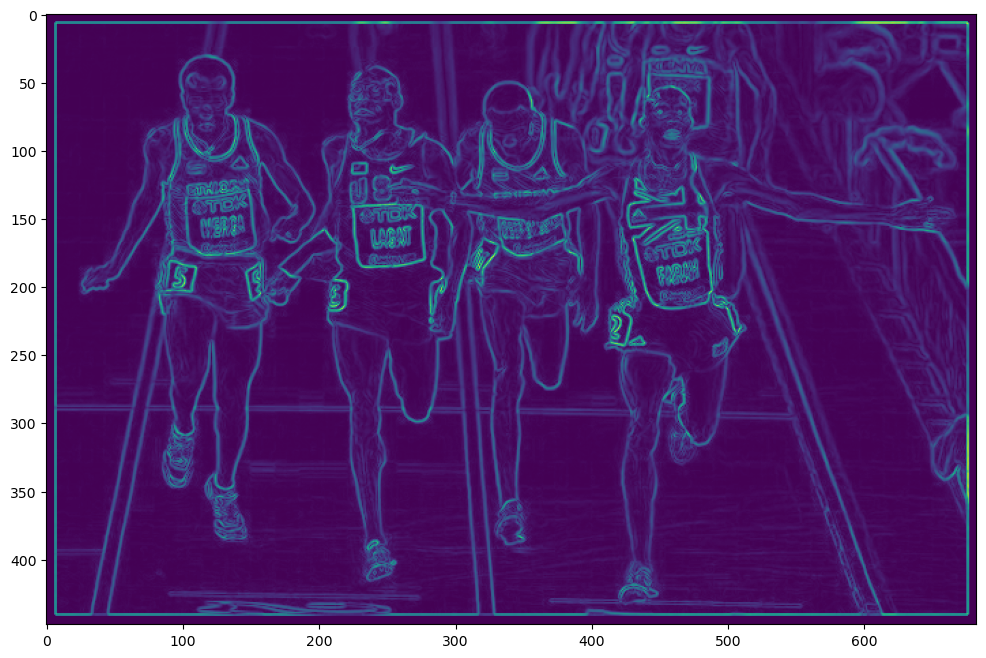

In [28]:
plt.figure(figsize=(12,10))
plt.imshow(maxmag)
plt.show()

Do the similar as gradient-magnitude, please calculate a 2-dimensional array, which contains only the gradient-angles of the locally strongest channel (strongest=channel with highest gradient).

In [29]:
###YOUR CODE###
maxangle=np.zeros(maxChan.shape)
for r in range(maxChan.shape[0]):
    for c in range(maxChan.shape[1]):
        maxangle[r,c]=angle[r,c,maxChan[r,c]]
print(maxangle.shape)
###YOUR CODE###

(448, 683)


Strongest gradient-magnitudes in the selected region:

In [30]:
print(maxmag[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[0.00554593 0.00392157 0.01240109 0.00784314 0.00554593 0.00392157
  0.         0.00876889]
 [0.01616904 0.01616904 0.01413942 0.00876889 0.00554593 0.
  0.00784314 0.01413942]
 [0.01999615 0.02385397 0.01109187 0.01240109 0.00392157 0.00784314
  0.00784314 0.01176471]
 [0.02986578 0.01616904 0.03551131 0.01176471 0.02111829 0.00876889
  0.01176471 0.01176471]
 [0.02827884 0.03161669 0.01960784 0.03941127 0.00876889 0.01109187
  0.01109187 0.01176471]
 [0.03551134 0.02745101 0.04722194 0.02986578 0.01999615 0.00876889
  0.00876889 0.01616904]
 [0.05462117 0.02480217 0.05462113 0.03161669 0.01616904 0.01240109
  0.00392157 0.00876889]
 [0.04094241 0.05113103 0.0277297  0.02772968 0.02385397 0.01240109
  0.00554593 0.01109187]]


Strongest gradient-angles in the selected region:

In [32]:
print((maxangle[Location[0]:Location[0]+W,Location[1]:Location[1]+W]).astype(int))

[[135   0  18   0  44   0   0  63]
 [104 104  56  26  44   0   0  33]
 [ 78  99 135 251  90 270   0   0]
 [336 165 186   0  21 206   0   0]
 [303 277 323  84  26 135 135   0]
 [173 270   4  23 168 116 116 104]
 [158 108  21 299 165  18 270 296]
 [343  94 134 261   9  18 224 315]]


#### Step 6: Create Histogram of single 8×8 region

For each 8×8 -region of the selected patch a 9-bin histogram is calculated. The bin-centers are


0°,20°,40°,60°,80°,100°,120°,140°,160°.

In [33]:
###YOUR CODE ###
def anglemapper(x):
    if x >=180:
        return x-180
    else:
        return x
###YOUR CODE ###

In [35]:
vfunc = np.vectorize(anglemapper)
mappedAngles=(vfunc(maxangle))
print((mappedAngles[Location[0]:Location[0]+W,Location[1]:Location[1]+W]).astype(int))

[[135   0  18   0  44   0   0  63]
 [104 104  56  26  44   0   0  33]
 [ 78  99 135  71  90  90   0   0]
 [156 165   6   0  21  26   0   0]
 [123  97 143  84  26 135 135   0]
 [173  90   4  23 168 116 116 104]
 [158 108  21 119 165  18  90 116]
 [163  94 134  81   9  18  44 135]]


After this mapping into the range [0,180]
, each of the 64 gradient-angles in the region contributes to one or two bins of the histogram as follows:

* If the gradient-angle Θ𝑖𝑗 is equal to one of the 9 bin-centers, then position 𝑖,𝑗 adds the value |𝑔𝑖𝑗| to the bin with center Θ𝑖𝑗 , where |𝑔𝑖𝑗| is the gradient-magnitude at position 𝑖,𝑗 

* If the gradient-angle Θ𝑖𝑗 lies between two bin-centers, where Θ𝐿 is the next lower and Θ𝑅 ist the next higher bin-center, then position 𝑖,𝑗 adds the value |𝑔𝑖𝑗|⋅𝑟 to the bin with center Θ𝑅 , and the value |𝑔𝑖𝑗|⋅(1−𝑟) to the bin with center Θ𝐿,

where

 $$
\frac{Θ𝑖𝑗−Θ𝐿}{20}
 $$
 
 Due to the circular nature of angles, the next higher bin center Θ𝑅 for all angles 160°<Θ𝑖𝑗<180° is 0°
 
 
 The function createHist(), as defined in the following code cell, calculates for the gradient-angles AngArray and the gradient magnitudes MagArray of a given array the corresponding histogram.

In [39]:
def createHist(AngArray,MagArray,BS=20,BINS=9):
    hist=np.zeros(BINS)
    for r in range(AngArray.shape[0]):
        for c in range(AngArray.shape[1]):
            #print(AngArray[r,c])
            binel,rem = np.divmod(AngArray[r,c],BS)
            weightR=rem*1.0/BS
            weightL=1-weightR
            deltaR=MagArray[r,c]*weightR
            deltaL=MagArray[r,c]*weightL
            binL=int(binel)
            binR=np.mod(binL+1,BINS)
            hist[binL]+=deltaL
            hist[binR]+=deltaR
    return hist         

In [43]:
spotAngles=mappedAngles[Location[0]:Location[0]+W,Location[1]:Location[1]+W]
spotMag=(maxmag[Location[0]:Location[0]+W,Location[1]:Location[1]+W]*255).astype(int)
spotHist=createHist(spotAngles,spotMag)
print('Gradient histogram of the selected region:')
print(spotHist)

Gradient histogram of the selected region:
[44.50706348 44.57413521  9.07622032  6.44614964 29.90317688 43.02519112
 27.53150635 18.46105728 38.47549973]


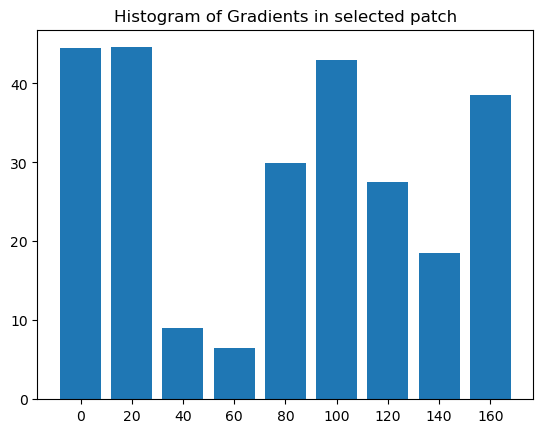

In [44]:
plt.bar(range(9),spotHist)
plt.xticks(range(9),[0,20,40,60,80,100,120,140,160])
plt.title("Histogram of Gradients in selected patch")
plt.show()


#### 7: Normalisation

The historgrams of gradients must be normalized in order to make them robust with respect to overall lighting. For example, consider the case, where a stronger lighting of the scene yields a doubling of all pixel values. Then also the gradient-magnitudes and thus the histogram-values will be doubled. In order to avoid this a L2-normalization is applied. However, this normalization is not processed across a single histogram but across a super-region of size 16×16 , which is covered by 4 histograms.

The following code cells draws the first two super-regions in the upper-left part of the considered patch. Each super-region contains 2×2 regions of size 8×8 . First a 36-Bin normalized histogram is calculated for the green super-region. Then the window is shifted by 8 pixels to the right to the position of the red super-region and so on. All in all there will be 7×15=105 super-region positions within this patch, resulting in a HoG-descriptor of length 105×36=7380𝐵𝑖𝑛𝑠.

 ![Object](./example.png)

In the following code-cells the normalized 36-Bin histogram for the green super-region is calculated.

In [51]:
hist11=spotHist
print(hist11)
spotAngles=mappedAngles[Location[0]:Location[0]+W,Location[1]+W:Location[1]+2*W]
spotMag=maxmag[Location[0]:Location[0]+W,Location[1]+W:Location[1]+2*W]
hist12=createHist(spotAngles,(spotMag*255).astype(int))
print(hist12)
spotAngles=mappedAngles[Location[0]+W:Location[0]+2*W,Location[1]:Location[1]+W]
spotMag=maxmag[Location[0]+W:Location[0]+2*W,Location[1]:Location[1]+W]
hist21=createHist(spotAngles,(spotMag*255).astype(int))
print(hist21)
spotAngles=mappedAngles[Location[0]+W:Location[0]+2*W,Location[1]+W:Location[1]+2*W]
spotMag=maxmag[Location[0]+W:Location[0]+2*W,Location[1]+W:Location[1]+2*W]
hist22=createHist(spotAngles,(spotMag*255).astype(int))
print(hist22)

[44.50706348 44.57413521  9.07622032  6.44614964 29.90317688 43.02519112
 27.53150635 18.46105728 38.47549973]
[76.80282819 47.61768286 37.12134056  9.4282732   5.97309494 13.86897888
 21.36178436 20.58637543 50.23964157]
[109.5326786   42.58056021  14.23917093  18.99718513   2.
  13.2411972   72.22285614 905.67467194 668.51167984]
[91.90755684 57.61332834 56.39097338 15.02910137 21.09482574 26.01958427
 27.99365387 44.88984108 58.0611351 ]


The four non-normalized histograms are visualized in the code-cell below:

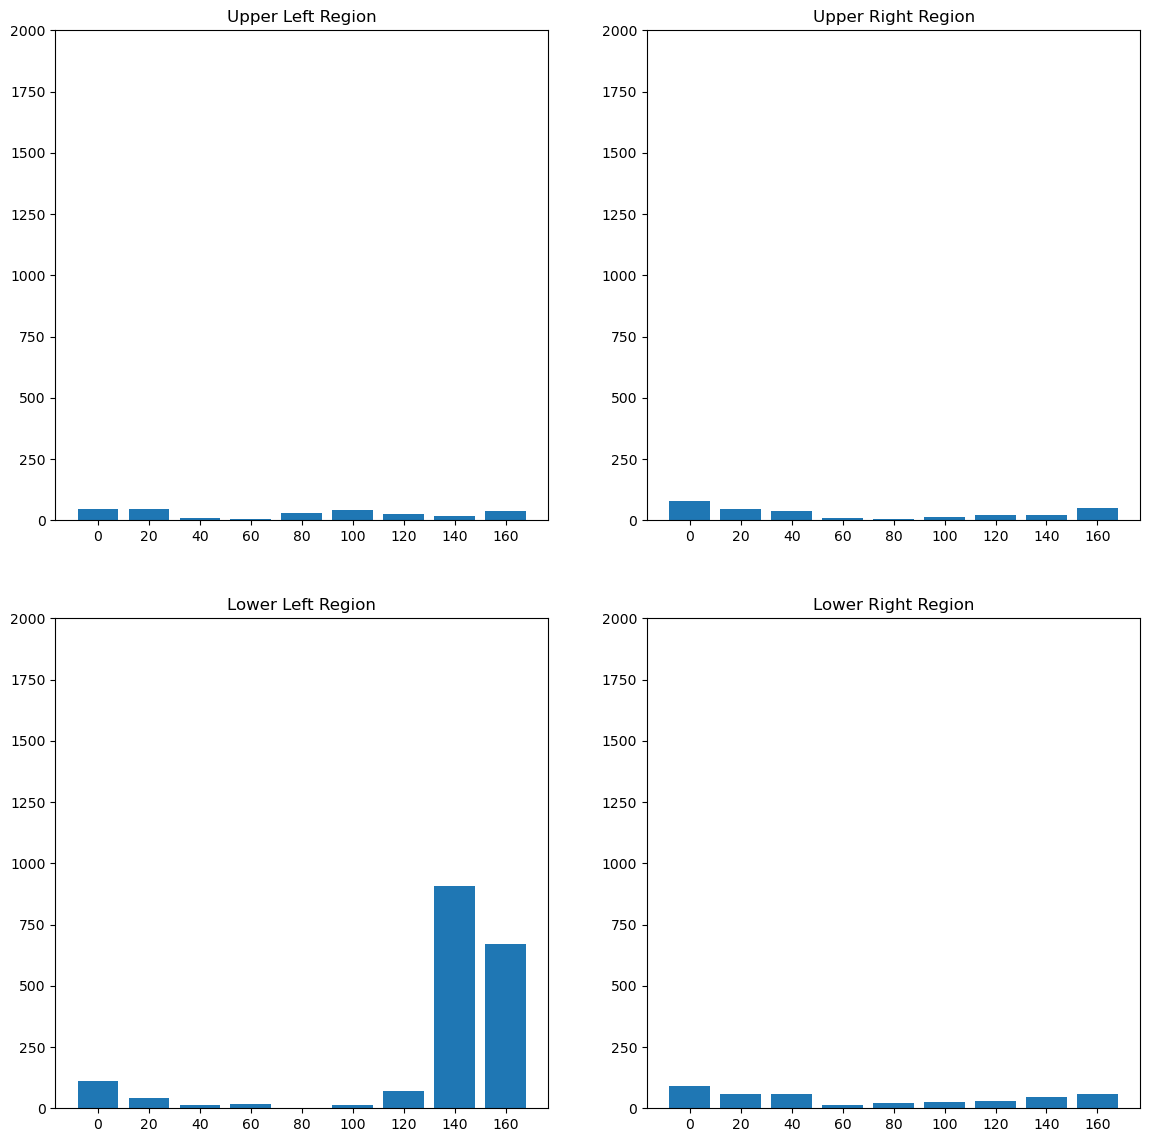

In [52]:
histList=[hist11,hist12,hist21,hist22]
titles=["Upper Left","Upper Right","Lower Left","Lower Right"]
plt.figure(figsize=(14,14))
i=1
for h in histList:
    plt.subplot(2,2,i)
    plt.title(titles[i-1]+" Region")
    plt.bar(range(9),h)
    plt.xticks(range(9),[0,20,40,60,80,100,120,140,160])
    plt.ylim((0,2000))
    i+=1
    #plt.title("Histogram of Gradients in selected patch")
plt.show()

In [53]:
histRegion=np.array([bin for hist in histList for bin in hist])
print("\nRaw Histogram of upper-left super-region:")
print(histRegion)

l2norm=np.sqrt(np.sum(histRegion**2))
print("\nL2-Norm:")
print(l2norm)
epsilon=1e-6 # define epsilon in order to prevent division by zero
histRegionNormed=histRegion/(l2norm+epsilon)
print("\nNormalized Histogram of upper-left super-region:")
print(histRegionNormed)



Raw Histogram of upper-left super-region:
[ 44.50706348  44.57413521   9.07622032   6.44614964  29.90317688
  43.02519112  27.53150635  18.46105728  38.47549973  76.80282819
  47.61768286  37.12134056   9.4282732    5.97309494  13.86897888
  21.36178436  20.58637543  50.23964157 109.5326786   42.58056021
  14.23917093  18.99718513   2.          13.2411972   72.22285614
 905.67467194 668.51167984  91.90755684  57.61332834  56.39097338
  15.02910137  21.09482574  26.01958427  27.99365387  44.88984108
  58.0611351 ]

L2-Norm:
1154.153122781913

Normalized Histogram of upper-left super-region:
[0.03856253 0.03862064 0.00786397 0.00558518 0.02590919 0.03727858
 0.02385429 0.01599533 0.03333656 0.06654475 0.04125768 0.03216327
 0.008169   0.00517531 0.01201658 0.01850862 0.01783678 0.04352944
 0.09490307 0.03689334 0.01233733 0.01645985 0.00173287 0.01147265
 0.06257649 0.78470928 0.57922269 0.07963203 0.04991827 0.04885918
 0.01302176 0.01827732 0.02254431 0.02425471 0.03889418 0.05030627]

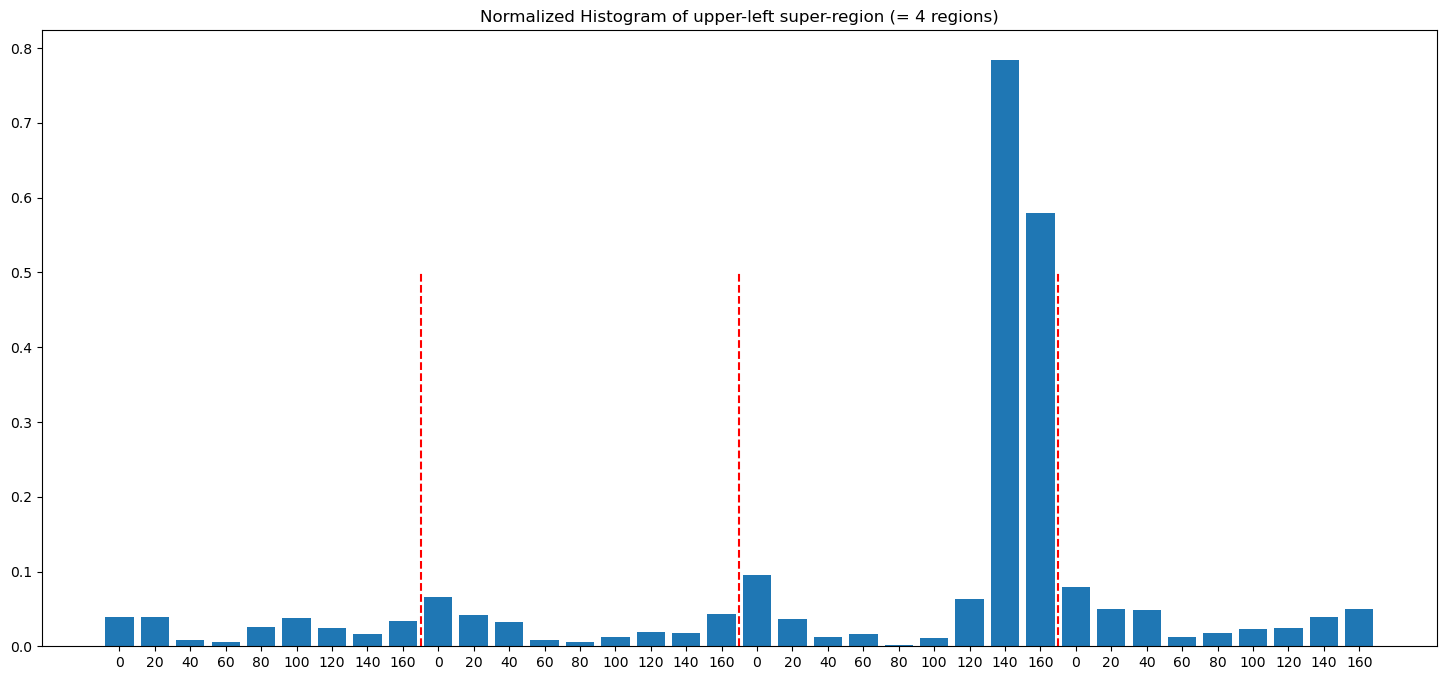

In [54]:
plt.figure(figsize=(18,8))
plt.bar(range(9*4),histRegionNormed)
plt.xticks(range(9*4),[0,20,40,60,80,100,120,140,160]*4)
for d in range(3):
    plt.plot([8.5+d*9,8.5+d*9],[0,0.5],"r--")
plt.title("Normalized Histogram of upper-left super-region (= 4 regions)")
plt.show()

#### Last step: you can calculate the historgram across all the image

## Scale-Invariant Feature Transform(SIFT)  for feature descriptor (#Homework) Deadline 1st April, 2024, 18:00


1. Select an image for SIFT
2. Implement SIFT for this image

In [1]:
##References: Harris Corner detector https://hannibunny.github.io/orbook/features/HoGfeatures.html
